# TASK 01 :

Create a Bar Chart or Histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.


# Population Data Analysis Using World Bank Dataset

This notebook analyzes the global population trends from 1960 to 2023 using the World Bank's total population dataset (`SP.POP.TOTL`). It includes country-level, region-wise, and income-group based visualizations.


Importing Necesarry Libraries :

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Uploading the dataset :

In [9]:
df_main = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_81108.csv', skiprows=4)
df_main.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


Drop Unwanted columns :

In [10]:
df_main = df_main.drop(columns=['Indicator Name', 'Indicator Code'])

Reshaping and Cleaning the Dataset :

In [11]:
df_long = df_main.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population')
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['Population'] = pd.to_numeric(df_long['Population'], errors='coerce')
df_long.dropna(inplace=True)

Enriching the Population data with Country Metadata :

In [12]:
df_meta_country = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_81108.csv')
df_meta_country = df_meta_country[['Country Code', 'Region', 'IncomeGroup']]
df_merged = pd.merge(df_long, df_meta_country, on='Country Code', how='left')

Top 10 Most Populous Countries (Latest Year) :

C:\Users\Hp\AppData\Local\Temp\ipykernel_4644\3232094819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Country Name', y='Population', palette='crest')


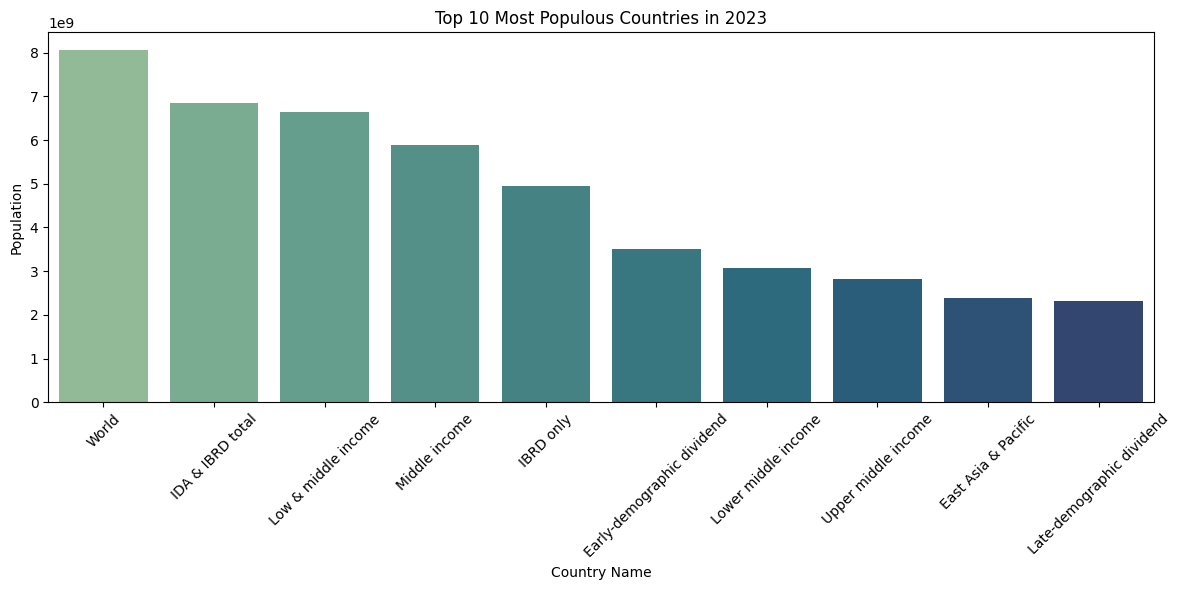

In [ ]:
latest_year = df_merged['Year'].max()
df_latest = df_merged[df_merged['Year'] == latest_year]
top10 = df_latest.sort_values(by='Population', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Country Name', y='Population', palette='crest')
plt.xticks(rotation=45)
plt.title(f"Top 10 Most Populous Countries in {int(latest_year)}")
plt.tight_layout()
plt.show()

Population Distribution Across Countries - 2023 :

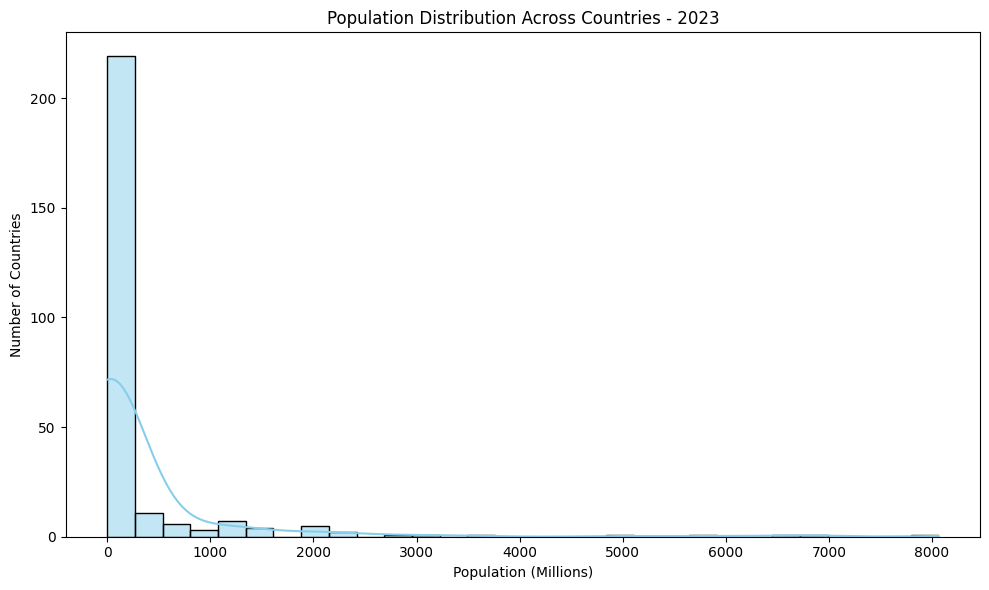

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_latest['Population'] / 1e6, bins=30, kde=True, color='skyblue')
plt.xlabel("Population (Millions)")
plt.ylabel("Number of Countries")
plt.title(f"Population Distribution Across Countries - {int(latest_year)}")
plt.tight_layout()
plt.show()

Population Growth Over Time (1960 - 2023) :

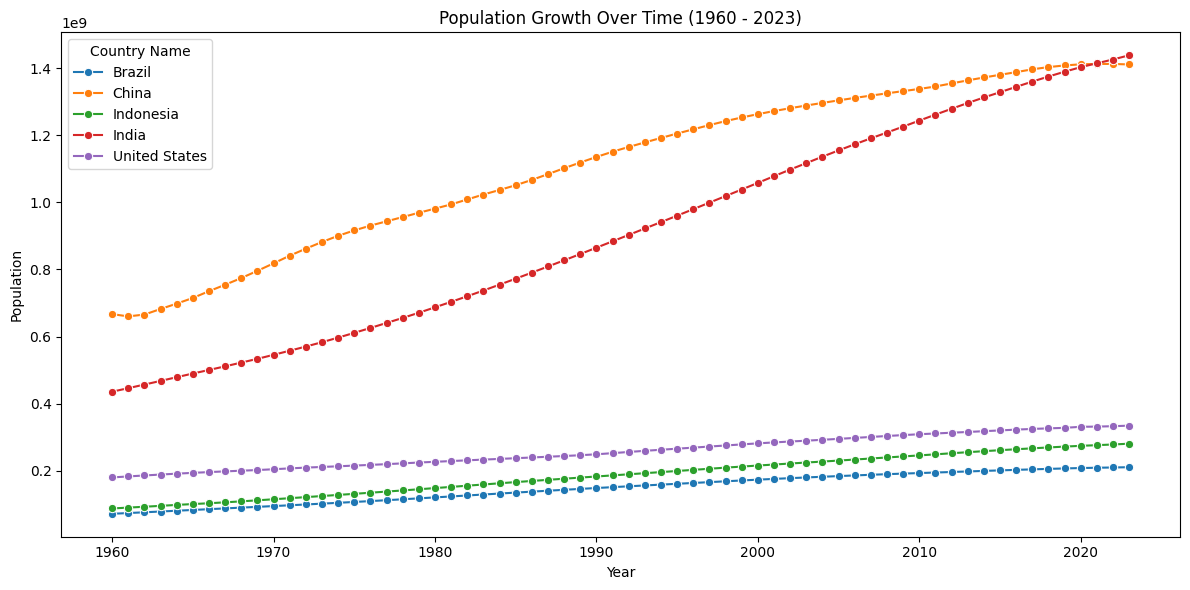

In [ ]:
countries = ['India', 'China', 'United States', 'Indonesia', 'Brazil']
df_selected = df_merged[df_merged['Country Name'].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_selected, x='Year', y='Population', hue='Country Name', marker='o')
plt.title("Population Growth Over Time (1960 - 2023)")
plt.ylabel("Population")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

Top 10 Populous Countries: 1960 vs 2023 :

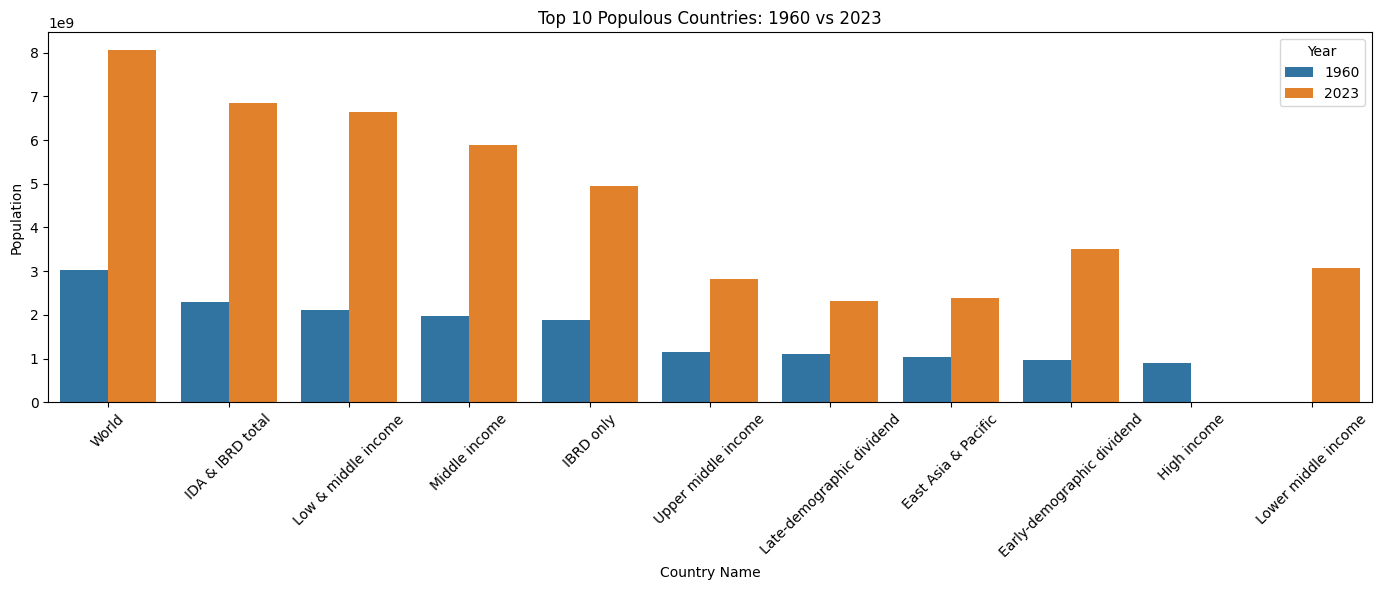

In [ ]:
df_1960 = df_merged[df_merged['Year'] == 1960].sort_values(by='Population', ascending=False).head(10)
df_2023 = df_latest.sort_values(by='Population', ascending=False).head(10)
df_1960['Year'] = '1960'
df_2023['Year'] = '2023'
df_compare = pd.concat([df_1960, df_2023])

plt.figure(figsize=(14,6))
sns.barplot(data=df_compare, x='Country Name', y='Population', hue='Year')
plt.xticks(rotation=45)
plt.title("Top 10 Populous Countries: 1960 vs 2023")
plt.tight_layout()
plt.show()

Top 10 Countries by Population Growth Rate :

C:\Users\Hp\AppData\Local\Temp\ipykernel_4644\3584500238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_growth_top['Growth %'], y=df_growth_top.index, palette='flare')


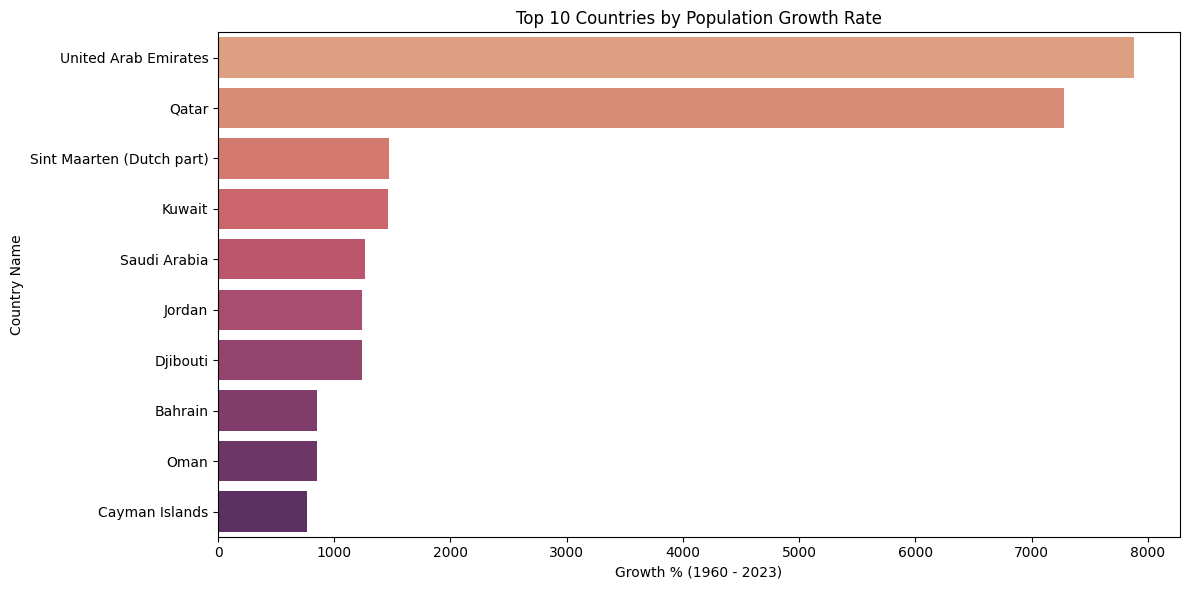

In [ ]:
df_growth = df_merged[df_merged['Year'].isin([1960, 2023])]
df_pivot = df_growth.pivot(index='Country Name', columns='Year', values='Population').dropna()
df_pivot['Growth %'] = ((df_pivot[2023] - df_pivot[1960]) / df_pivot[1960]) * 100
df_growth_top = df_pivot.sort_values(by='Growth %', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=df_growth_top['Growth %'], y=df_growth_top.index, palette='flare')
plt.xlabel("Growth % (1960 - 2023)")
plt.title("Top 10 Countries by Population Growth Rate")
plt.tight_layout()
plt.show()

Total Population by Region - 2023 :

C:\Users\Hp\AppData\Local\Temp\ipykernel_4644\2996422357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_region, x='Region', y='Population', palette='viridis')


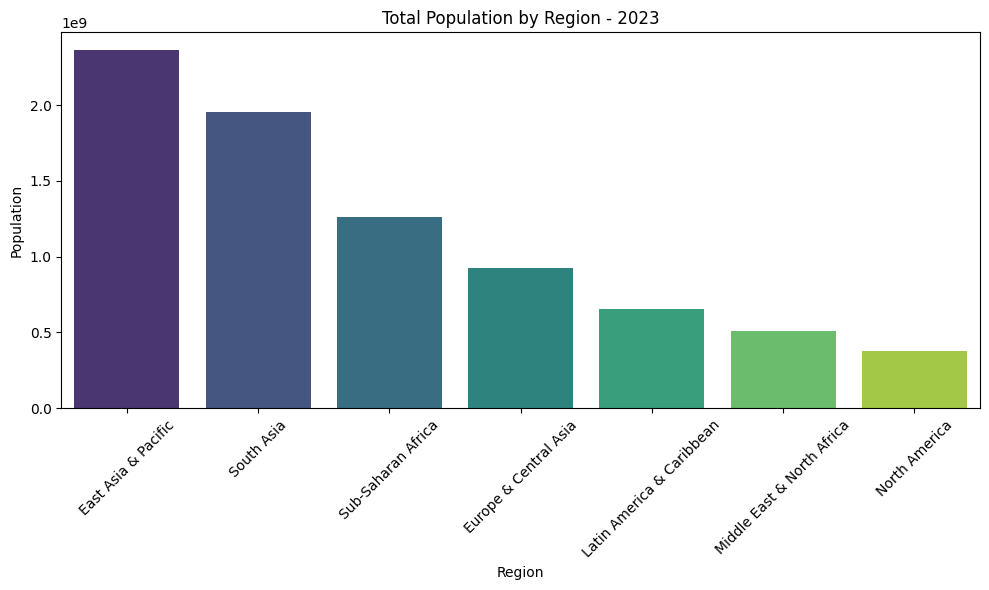

In [ ]:
df_region = df_latest.groupby('Region')['Population'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_region, x='Region', y='Population', palette='viridis')
plt.xticks(rotation=45)
plt.title(f"Total Population by Region - {int(df_latest['Year'].max())}")
plt.tight_layout()
plt.show()

Average Country Population by Income Group - 2023 :

C:\Users\Hp\AppData\Local\Temp\ipykernel_4644\783880898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_income, x='IncomeGroup', y='Population', palette='Set2')


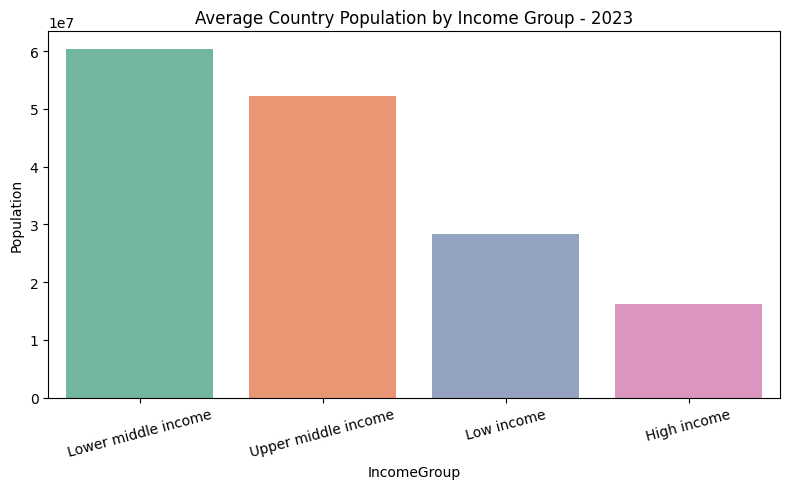

In [ ]:
df_income = df_latest.groupby('IncomeGroup')['Population'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=df_income, x='IncomeGroup', y='Population', palette='Set2')
plt.title(f"Average Country Population by Income Group - {int(df_latest['Year'].max())}")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

 Time Series by Region and by Income Group :

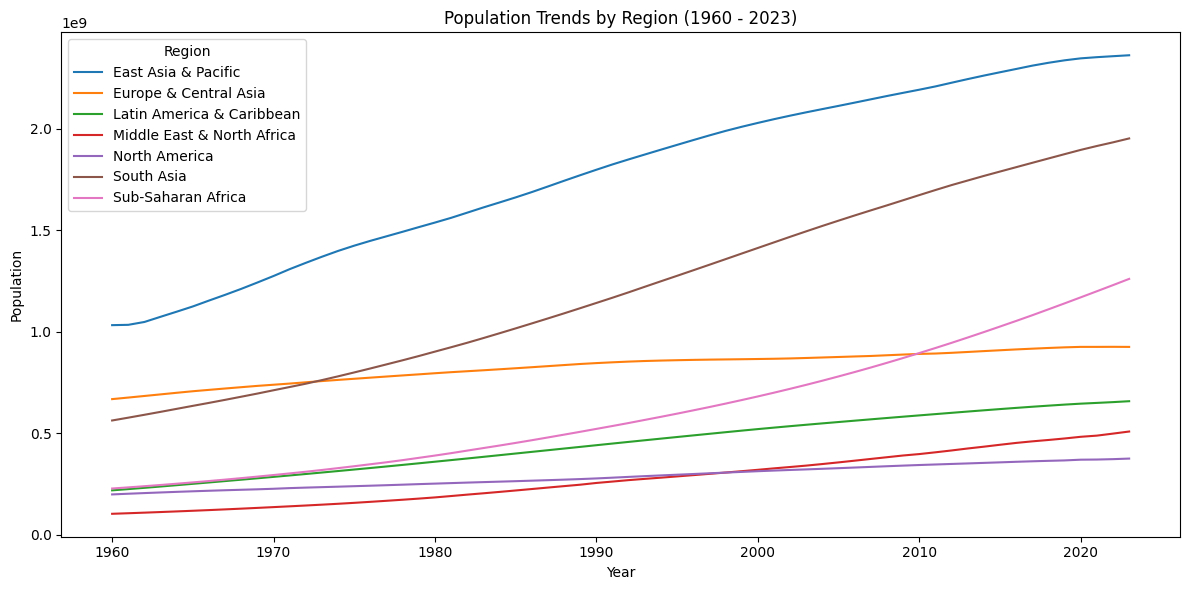

In [ ]:
df_region_time = df_merged.groupby(['Year', 'Region'])['Population'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_region_time, x='Year', y='Population', hue='Region')
plt.title("Population Trends by Region (1960 - 2023)")
plt.tight_layout()
plt.show()

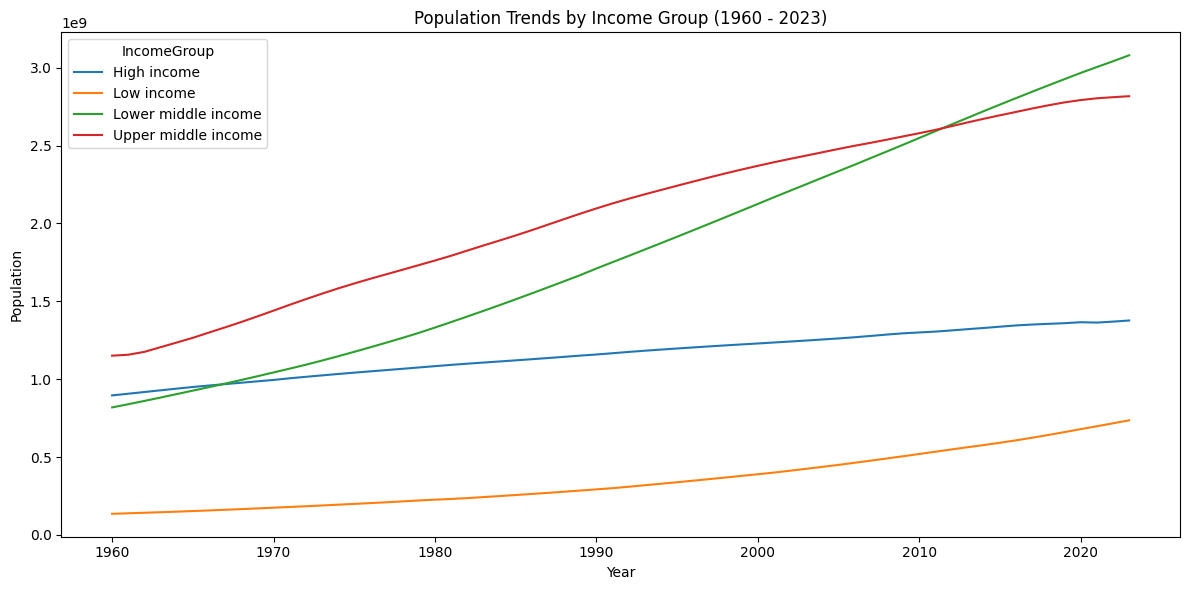

In [23]:
df_income_time = df_merged.groupby(['Year', 'IncomeGroup'])['Population'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_income_time, x='Year', y='Population', hue='IncomeGroup')
plt.title("Population Trends by Income Group (1960 - 2023)")
plt.tight_layout()
plt.show()


##  Key Insights from Population Data (1960–2023)

###  Country-Level Trends

1. **China and India Dominate**
   - As of 2023, China and India together account for over one-third of the world’s total population.

2. **Emerging Population Giants**
   - Nigeria, Pakistan, and Indonesia are climbing the global ranks rapidly, indicating high population growth and urbanization trends.

3. **Developed Countries Show Population Plateau**
   - Countries like Japan, Germany, and Italy are experiencing stagnant or even negative population growth due to aging populations and low birth rates.

###  Region-Level Observations

4. **Asia Leads in Total Population**
   - Asia remains the most populous region by far, driven primarily by China, India, and Southeast Asian nations.

5. **Sub-Saharan Africa’s Population Boom**
   - Sub-Saharan Africa has the highest population growth rate since the year 2000, indicating a very young and growing demographic.

6. **Europe Shows Signs of Decline**
   - Europe’s population has remained nearly flat or slightly declined over the past two decades.

###  Income Group Trends

7. **Low-Income Countries Are Growing Fastest**
   - These countries have experienced the largest relative population growth since 1960.

8. **High-Income Countries Remain Stable**
   - Population in high-income countries grows modestly or even declines, often offset by immigration rather than birth rate increases.

###  Long-Term Time Series Insights

9. **Global Population Has More Than Doubled**
   - The world population increased from around 3 billion in 1960 to over 8 billion in 2023.

10. **Urbanization and Health Advances Drive Growth**
    - Improvements in healthcare, urbanization, and public services correlate with population spikes in emerging nations.

###  Bonus Observation

11. **Population Density Outliers**
    - Small but densely populated nations (e.g., Singapore, Bahrain) exhibit large population figures relative to their size, highlighting density challenges.
